In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/train_images/f09cfc6a4dbd.png
/kaggle/input/aptos2019-blindness-detection/train_images/1ca91751be4d.png
/kaggle/input/aptos2019-blindness-detection/train_images/1dd9adcbfff4.png
/kaggle/input/aptos2019-blindness-detection/train_images/2cacdb0dffae.png
/kaggle/input/aptos2019-blindness-detection/train_images/b09101adb478.png
/kaggle/input/aptos2019-blindness-detection/train_images/64b9206afb3f.png
/kaggle/input/aptos2019-blindness-detection/train_images/11b220a397b8.png
/kaggle/input/aptos2019-blindness-detection/train_images/ae20112e7a1e.png
/kaggle/input/aptos2019-blindness-detection/train_images/b89938407ee6.png
/kaggle/input/aptos2019-blindness-detection/train_images/9c5dd3612f0c.png
/kaggle/input/aptos2019-blindness-detection/train_images/e7fc93ac5b6d.png
/kaggle/input

/kaggle/input/aptos2019-blindness-detection/train_images/65a7fe9482fe.png
/kaggle/input/aptos2019-blindness-detection/train_images/18323d8f2470.png
/kaggle/input/aptos2019-blindness-detection/train_images/7dee6bf8b9c1.png
/kaggle/input/aptos2019-blindness-detection/train_images/cd1c98ec48b1.png
/kaggle/input/aptos2019-blindness-detection/train_images/b8e20c076b03.png
/kaggle/input/aptos2019-blindness-detection/train_images/ea5c42a78979.png
/kaggle/input/aptos2019-blindness-detection/train_images/2923971566fe.png
/kaggle/input/aptos2019-blindness-detection/train_images/4927945ecfed.png
/kaggle/input/aptos2019-blindness-detection/train_images/6987804eb464.png
/kaggle/input/aptos2019-blindness-detection/train_images/48afe8c47454.png
/kaggle/input/aptos2019-blindness-detection/train_images/5321ab64f9ea.png
/kaggle/input/aptos2019-blindness-detection/train_images/7ee6de71c140.png
/kaggle/input/aptos2019-blindness-detection/train_images/fe0e2dee1834.png
/kaggle/input/aptos2019-blindness-dete

/kaggle/input/aptos2019-blindness-detection/test_images/fa98490bc13c.png
/kaggle/input/aptos2019-blindness-detection/test_images/948c75fbe02f.png
/kaggle/input/aptos2019-blindness-detection/test_images/9f2539320e85.png
/kaggle/input/aptos2019-blindness-detection/test_images/74c97e963ca4.png
/kaggle/input/aptos2019-blindness-detection/test_images/938a59f04582.png
/kaggle/input/aptos2019-blindness-detection/test_images/a444ca028295.png
/kaggle/input/aptos2019-blindness-detection/test_images/3ef3056cc3d0.png
/kaggle/input/aptos2019-blindness-detection/test_images/4947431500d5.png
/kaggle/input/aptos2019-blindness-detection/test_images/5d3d0306074c.png
/kaggle/input/aptos2019-blindness-detection/test_images/6e2d7cee2d91.png
/kaggle/input/aptos2019-blindness-detection/test_images/086727c22b75.png
/kaggle/input/aptos2019-blindness-detection/test_images/5b81f6394a99.png
/kaggle/input/aptos2019-blindness-detection/test_images/f07ca35b523b.png
/kaggle/input/aptos2019-blindness-detection/test_im

/kaggle/input/aptos2019-blindness-detection/test_images/f47c5fc86387.png
/kaggle/input/aptos2019-blindness-detection/test_images/d64a07eb634d.png
/kaggle/input/aptos2019-blindness-detection/test_images/18f09deddab7.png
/kaggle/input/aptos2019-blindness-detection/test_images/c537a3ca84b1.png
/kaggle/input/aptos2019-blindness-detection/test_images/0111b949947e.png
/kaggle/input/aptos2019-blindness-detection/test_images/de3afa3ddd6e.png
/kaggle/input/aptos2019-blindness-detection/test_images/8a2b969112a7.png
/kaggle/input/aptos2019-blindness-detection/test_images/39a7cac6ac9c.png
/kaggle/input/aptos2019-blindness-detection/test_images/0e9d6c70eaf7.png
/kaggle/input/aptos2019-blindness-detection/test_images/764e6ea355ac.png
/kaggle/input/aptos2019-blindness-detection/test_images/2a18955eeb41.png
/kaggle/input/aptos2019-blindness-detection/test_images/49a91567632e.png
/kaggle/input/aptos2019-blindness-detection/test_images/e23d7cd089fa.png
/kaggle/input/aptos2019-blindness-detection/test_im

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
if not os.path.exists('/tmp/.cache/torch/checkpoints/'):
        os.makedirs('/tmp/.cache/torch/checkpoints/')
!cp '../input/resnet50/resnet50.pth' '/tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth'

cp: cannot stat '../input/resnet50/resnet50.pth': No such file or directory


In [4]:
import os
os.listdir('../input')

['aptos2019-blindness-detection']

In [5]:
print('Make sure cudnn is enabled:', torch.backends.cudnn.enabled)

Make sure cudnn is enabled: True


In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

SEED = 999
seed_everything(SEED)

In [7]:
base_image_dir = os.path.join('..', 'input/A.Segmentation/training/')
train_dir = os.path.join(base_image_dir,'train_images/')
df = pd.read_csv(os.path.join(base_image_dir, 'train.csv'))
df['path'] = df['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
df = df.drop(columns=['id_code'])
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,diagnosis,path
0,2,../input/aptos2019-blindness-detection/train_i...
1,1,../input/aptos2019-blindness-detection/train_i...
2,0,../input/aptos2019-blindness-detection/train_i...
3,4,../input/aptos2019-blindness-detection/train_i...
4,0,../input/aptos2019-blindness-detection/train_i...
5,3,../input/aptos2019-blindness-detection/train_i...
6,2,../input/aptos2019-blindness-detection/train_i...
7,0,../input/aptos2019-blindness-detection/train_i...
8,0,../input/aptos2019-blindness-detection/train_i...
9,1,../input/aptos2019-blindness-detection/train_i...


In [8]:
len_df = len(df)
print(f"There are {len_df} images")

There are 3662 images


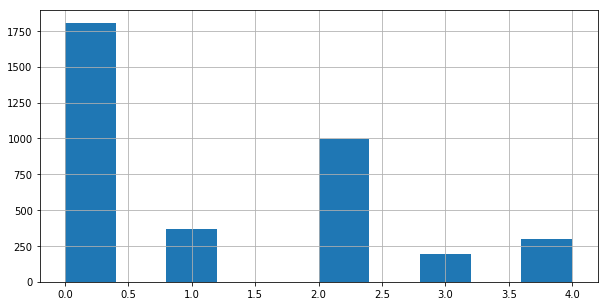

In [9]:
df['diagnosis'].hist(figsize = (10, 5))

In [10]:
from PIL import Image

im = Image.open(df['path'][1])
width, height = im.size
print(width,height) 
im.show()

2896 1944


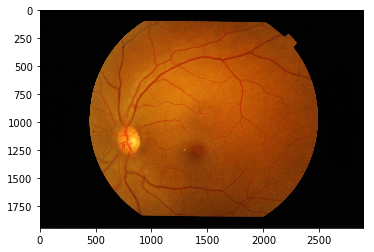

In [11]:
plt.imshow(np.asarray(im))

In [12]:
bs = 64
sz= 224

In [13]:
tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,
                      max_zoom=1.1,max_lighting=0.1,
                      p_lighting=0.5)
src = (ImageList.from_df(df=df,path='./',cols='path') 
        .split_by_rand_pct(0.2) #Split the dataset
        .label_from_df(cols='diagnosis',label_cls=FloatList) #obtaining labels
      )
data= (src.transform(tfms,size=sz,resize_method=ResizeMethod.SQUISH,padding_mode='zeros') #Data augmentation
        .databunch(bs=bs,num_workers=4) #DataBunch
        .normalize(imagenet_stats) #Normalize     
       )

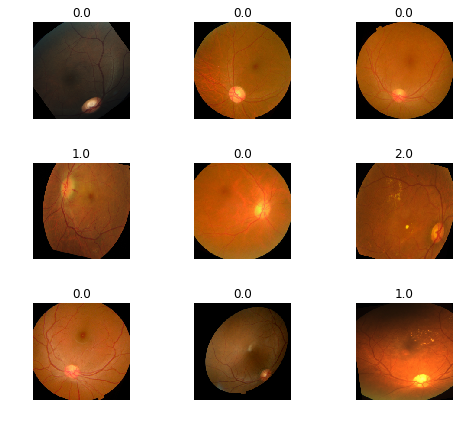

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
!cd /tmp/.chace/torch/checkpoints/

/bin/sh: 1: cd: can't cd to /tmp/.chace/torch/checkpoints/


In [16]:
from sklearn.metrics import cohen_kappa_score
def quadratic_kappa(y_hat, y):
    return torch.tensor(cohen_kappa_score(torch.round(y_hat), y, weights='quadratic'),device='cuda:0')

In [17]:
learn = cnn_learner(data, base_arch=models.resnet50, metrics = [quadratic_kappa])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 28.6MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 1.00E-02


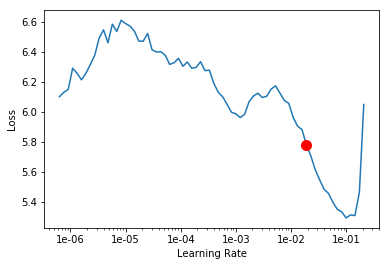

In [18]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(4,max_lr = 1e-2)

In [ ]:
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-3))

In [ ]:
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

In [ ]:
learn.export()
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
valid_preds = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
import numpy as np
import pandas as pd
import os
import scipy as sp
from functools import partial
from sklearn import metrics
from collections import Counter
import json

In [ ]:
class OptimizedRounder(object):
    def __init__(self):
        self.coef_ = 0

    def _kappa_loss(self, coef, X, y):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4

        ll = metrics.cohen_kappa_score(y, X_p, weights='quadratic')
        return -ll

    def fit(self, X, y):
        loss_partial = partial(self._kappa_loss, X=X, y=y)
        initial_coef = [0.5, 1.5, 2.5, 3.5]
        self.coef_ = sp.optimize.minimize(loss_partial, initial_coef, method='nelder-mead')
        print(-loss_partial(self.coef_['x']))

    def predict(self, X, coef):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4
        return X_p

    def coefficients(self):
        return self.coef_['x']

In [ ]:
optR = OptimizedRounder()
optR.fit(valid_preds[0],valid_preds[1])

In [ ]:
coefficients = optR.coefficients()
print(coefficients)

In [ ]:
from fastai.core import *
from fastai.basic_data import *
from fastai.basic_train import *
from fastai.torch_core import *
def _tta_only(learn:Learner, ds_type:DatasetType=DatasetType.Valid, num_pred:int=10) -> Iterator[List[Tensor]]:
    "Computes the outputs for several augmented inputs for TTA"
    dl = learn.dl(ds_type)
    ds = dl.dataset
    old = ds.tfms
    aug_tfms = [o for o in learn.data.train_ds.tfms]
    try:
        pbar = master_bar(range(num_pred))
        for i in pbar:
            ds.tfms = aug_tfms
            yield get_preds(learn.model, dl, pbar=pbar)[0]
    finally: ds.tfms = old

Learner.tta_only = _tta_only

def _TTA(learn:Learner, beta:float=0, ds_type:DatasetType=DatasetType.Valid, num_pred:int=10, with_loss:bool=False) -> Tensors:
    "Applies TTA to predict on `ds_type` dataset."
    preds,y = learn.get_preds(ds_type)
    all_preds = list(learn.tta_only(ds_type=ds_type, num_pred=num_pred))
    avg_preds = torch.stack(all_preds).mean(0)
    if beta is None: return preds,avg_preds,y
    else:            
        final_preds = preds*beta + avg_preds*(1-beta)
        if with_loss: 
            with NoneReduceOnCPU(learn.loss_func) as lf: loss = lf(final_preds, y)
            return final_preds, y, loss
        return final_preds, y

Learner.TTA = _TTA

In [ ]:
preds,y = learn.TTA(ds_type=DatasetType.Test)

In [ ]:
test_predictions = optR.predict(preds, coefficients)

In [ ]:
sample_df.diagnosis = test_predictions.astype(int)
sample_df.head()

In [ ]:
sample_df.to_csv('submission.csv',index=False)